# <center>Линейная алгебра в контексте линейных методов. Часть II
## <center>Неоднородные СЛАУ
### <center>Случай «ИДЕАЛЬНАЯ ПАРА»

In [30]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

In [3]:
A = np.array([
    [4, 7],
    [5, 10]
])
b = np.array([[20, 30]]).reshape(2, 1)
Ab = np.append(A, b, axis=1)
num_of_unk_var = len(A[0])
rank_a = np.linalg.matrix_rank(A)
rank_ab = np.linalg.matrix_rank(Ab)
print('matrix A:\n', A, sep='')
print('\nvector b:\n', b, sep='')
print('\nrank(A):', rank_a)
print('\nrank(A|b):', rank_ab)
print('\nNumber of unknown variables:', num_of_unk_var)
xy = np.linalg.inv(A) @ b
print('\nOnly decision')
print(xy)

matrix A:
[[ 4  7]
 [ 5 10]]

vector b:
[[20]
 [30]]

rank(A): 2

rank(A|b): 2

Number of unknown variables: 2

Only decision
[[-2.]
 [ 4.]]


### <center>Случай «В АКТИВНОМ ПОИСКЕ»

In [4]:
A = np.array([
    [4, 7, -1],
    [2, 1, 1]
])
b = np.array([[7, 2]]).reshape(2, 1)
Ab = np.append(A, b, axis=1)
num_of_unk_var = len(A[0])
rank_a = np.linalg.matrix_rank(A)
rank_ab = np.linalg.matrix_rank(Ab)
print('matrix A:\n', A, sep='')
print('\nvector b:\n', b, sep='')
print('\nrank(A):', rank_a)
print('\nrank(A|b):', rank_ab)
print('\nNumber of unknown variables:', num_of_unk_var)
print('\nInfinity decisions')

matrix A:
[[ 4  7 -1]
 [ 2  1  1]]

vector b:
[[7]
 [2]]

rank(A): 2

rank(A|b): 2

Number of unknown variables: 3

Infinity decisions


In [5]:
# 2.6
A = np.array([
    [4, 7, -1],
    [-4, 2, 5],
    [0, 9, 4]
])
b = np.array([7, 3, 10]).reshape(3, 1)
Ab = np.append(A, b, axis=1)
num_of_unk_var = len(A[0])
rank_a = np.linalg.matrix_rank(A)
rank_ab = np.linalg.matrix_rank(Ab)
print('matrix A:\n', A, sep='')
print('\nvector b:\n', b, sep='')
print('\nrank(A):', rank_a)
print('\nrank(A|b):', rank_ab)
print('\nNumber of unknown variables:', num_of_unk_var)
print('\nInfinity decisions')

matrix A:
[[ 4  7 -1]
 [-4  2  5]
 [ 0  9  4]]

vector b:
[[ 7]
 [ 3]
 [10]]

rank(A): 2

rank(A|b): 2

Number of unknown variables: 3

Infinity decisions


### <center>Случай «ВСЁ СЛОЖНО». OLS

In [6]:
# 2.9
A = np.array([
    [1, -5],
    [2, 1],
    [1, 1]
])
b = np.array([1, 2, 2])
widehat_w = np.array([1, 1])
error_vec = (b - (A @ widehat_w)).reshape(3, 1)
print('Error vector:\n', error_vec, sep='')

Error vector:
[[ 5]
 [-1]
 [ 0]]


In [7]:
# 2.11
A = np.array([
    [1, 2],
    [-3, 1],
    [1, 2],
    [1, -1]
])
b = np.array([1, 4, 5, 0]).reshape(len(A), 1)
gram_matrix = A.T @ A
inv_gram = np.linalg.inv(gram_matrix)
scalar_columns_b = A.T @ b
hat_omega = inv_gram @ scalar_columns_b
print(
    'matrix A:\n', A, 
    '\n\nvector b:\n', b,
    '\n\nGram matrix for columns:\n', gram_matrix,
    '\n\nInverted gram matrix:\n', inv_gram,
    '\n\nA^T * b:\n', scalar_columns_b,
    '\n\nPredicted coeffs omega:\n', hat_omega, sep=''
)



matrix A:
[[ 1  2]
 [-3  1]
 [ 1  2]
 [ 1 -1]]

vector b:
[[1]
 [4]
 [5]
 [0]]

Gram matrix for columns:
[[12  0]
 [ 0 10]]

Inverted gram matrix:
[[0.08333333 0.        ]
 [0.         0.1       ]]

A^T * b:
[[-6]
 [16]]

Predicted coeffs omega:
[[-0.5]
 [ 1.6]]


## <center>Линейная регрессия

In [8]:
# 3.5
data = np.array([[1, 0.2, 6]])
w_hat = np.array([[-29.3, -0.26, 8.4]]).reshape(3, 1)
data @ w_hat

array([[21.048]])

### Особенности класса `LinearRegression`

In [9]:
# создадим вырожденную матрицу А
A = np.array([
    [1, 1, 1, 1], 
    [2, 1, 1, 2], 
    [-2, -1, -1, -2]]
).T
y = np.array([1, 2, 5, 1])
# вычислим OLS-оценку для коэффициентов
try:
    w_hat=np.linalg.inv(A.T@A)@A.T@y
    print(w_hat)
except np.linalg.LinAlgError:
    print('LinAlgError: Singular matrix')

LinAlgError: Singular matrix


**Сингулярное разложение (SVD)**

In [10]:
# создаём модель линейной регрессии
model = LinearRegression(fit_intercept=False)
# вычисляем коэффициенты регрессии
model.fit(A, y)
print('w_hat:', model.coef_)

w_hat: [ 6.   -1.25  1.25]


**Сингулярное разложение** зашито в функцию `np.linalg.lstsq()`, которая позволяет в одну строку построить модель линейной регрессии по МНК:

In [11]:
# классическая OLS-регрессия в numpy с возможностью получения решения даже для вырожденных матриц
np.linalg.lstsq(A, y, rcond=None)

(array([ 6.  , -1.25,  1.25]),
 array([], dtype=float64),
 2,
 array([4.86435029e+00, 5.81460412e-01, 3.42443768e-17]))

Функция возвращает четыре значения:

* вектор рассчитанных коэффициентов линейной регрессии;
* сумму квадратов ошибок, $MSE$ (она не считается, если ранг матрицы $A$ меньше числа неизвестных, как в нашем случае);
* ранг матрицы $A$;
* вектор из сингулярных значений, которые как раз и оберегают нас от ошибки.

## <center>Стандартизация векторов и матрица корреляций
Для функции `linalg.norm()` обязательно необходимо указать параметр `axis=0`, так как по умолчанию норма считается для всей матрицы, а не для каждого столбца в отдельности
```python
# составляем матрицу наблюдений без дополнительного столбца из единиц
A = boston_data[['CHAS', 'LSTAT', 'CRIM','RM']]
y = boston_data[['PRICE']]
# стандартизируем векторы в столбцах матрицы A
A_cent = A - A.mean()
A_st = A_cent / np.linalg.norm(A_cent, axis=0)
A_st.describe().round(2)
```
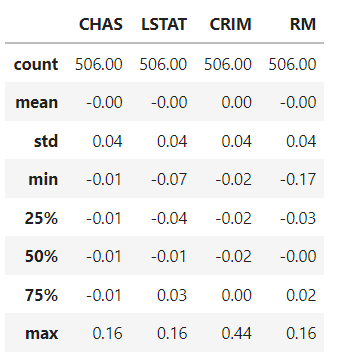
```python
Для получения стандартизированных коэффициентов нам также понадобится стандартизация целевой переменной  по тому же принципу:

# стандартизируем вектор целевой переменной
y_cent = y - y.mean()
y_st = y_cent/np.linalg.norm(y_cent)
```
Формула для вычисления коэффициента та же, что и раньше, только матрица $A$ теперь заменяется на $A_{st}$, а $y$ — на $y_{st}$:
```python
# вычислим OLS-оценку для стандартизированных коэффициентов
w_hat_st=np.linalg.inv(A_st.T@A_st)@A_st.T@y_st
print(w_hat_st.values)
```
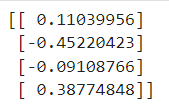
```python
# матрица Грама
A_st.T @ A_st
```
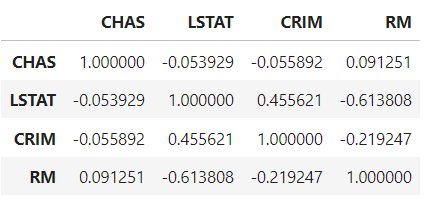  
На самом деле мы с вами только что вычислили **матрицу выборочных корреляций** наших исходных факторов

In [12]:
# 4.3
x = np.array([12, 8])
x_cent = x - x.mean()
x_std = (x_cent / np.linalg.norm(x_cent)).round(3)
print('vector x:', x, '\nvector x_std:', x_std, sep='')

vector x:[12  8]
vector x_std:[ 0.707 -0.707]


## <center>Корреляционная матрица

In [13]:
x_1 = np.array([1, 2, 6])
x_2 = np.array([3000, 1000, 2000])
np.corrcoef(x_1, x_2)

array([[ 1.        , -0.18898224],
       [-0.18898224,  1.        ]])

In [14]:
# 4.7
v = np.array([5, 1, 2])
u = np.array([4, 2, 8])
np.corrcoef(v, u).round(2)

array([[1.  , 0.05],
       [0.05, 1.  ]])

In [15]:
# 4.8
x_1 = np.array([5.1, 1.8, 2.1, 10.3, 12.1, 12.6])
x_2 = np.array([10.2, 3.7, 4.1, 20.5, 24.2, 24.1])
x_3 = np.array([2.5, 0.9, 1.1, 5.1, 6.1, 6.3])
corr_matrix = pd.DataFrame(np.array([x_1, x_2, x_3]).T).corr()
print(
    'Rank = ', np.linalg.matrix_rank(corr_matrix),
    '\nDeterminant = ', np.linalg.det(corr_matrix).round(7),
    sep=''
)

Rank = 3
Determinant = 5e-07


## <center>Полиномиальная регрессия

In [16]:
A = np.array([
    [1, 3, -2, 1, 5, 13, 1],
    [3, 4, 5, -2, 4, 11, 3],
    [4, 5, 2, 2, 6, 8, -1],
]).T
print(A)

[[ 1  3  4]
 [ 3  4  5]
 [-2  5  2]
 [ 1 -2  2]
 [ 5  4  6]
 [13 11  8]
 [ 1  3 -1]]


In [17]:
poly = PolynomialFeatures(degree=2, include_bias=True)
A_poly = poly.fit_transform(A)
display(pd.DataFrame(A_poly))

,0,1,2,3,4,5,6,7,8,9
0,1.0,1.0,3.0,4.0,1.0,3.0,4.0,9.0,12.0,16.0
1,1.0,3.0,4.0,5.0,9.0,12.0,15.0,16.0,20.0,25.0
2,1.0,-2.0,5.0,2.0,4.0,-10.0,-4.0,25.0,10.0,4.0
3,1.0,1.0,-2.0,2.0,1.0,-2.0,2.0,4.0,-4.0,4.0
4,1.0,5.0,4.0,6.0,25.0,20.0,30.0,16.0,24.0,36.0
5,1.0,13.0,11.0,8.0,169.0,143.0,104.0,121.0,88.0,64.0
6,1.0,1.0,3.0,-1.0,1.0,3.0,-1.0,9.0,-3.0,1.0


In [18]:
# 6.4
def polynomial_regression(X, y, k):
    poly = PolynomialFeatures(degree=k, include_bias=True)
    X_poly = poly.fit_transform(X)
    w_hat = np.linalg.inv(X_poly.T@X_poly)@X_poly.T@y
    y_pred = X_poly @ w_hat
    return X_poly, y_pred, w_hat

X = np.array([1, 3, -2, 9]).reshape(4, 1)
y = np.array([3, 7, -5, 21]).reshape(4, 1)

X_poly, y_pred, w_hat = polynomial_regression(X, y, 2)
w_hat.round(1)

array([[ 0.1],
       [ 2.5],
       [-0. ]])

## <center> Регуляризация
### <center>L-2-регуляризация

In [19]:
# матрица наблюдений (включая столбец единиц)
A = np.array([
    [1, 1, 1, 1, 1],
    [1, 0, -3, 2, 4],
    [2, 0, -6, 4, 8]
]).T
# вектор целевого признака
y = np.array([4, 3, -4, 2, 7])
# единичная матрица
E = np.eye(3)
# коэффициент регуляризации 
alpha = 5
# получаем оценку коэффициентов регрессии по МНК с регуляризацией Тихонова
w_hat_ridge = np.linalg.inv(A.T@A+alpha*E)@A.T@y
print(w_hat_ridge) 

[0.6122449  0.29387755 0.5877551 ]


In [21]:
# матрица наблюдений (включая столбец единиц)
A = np.array([
    [1, 1, 1, 1, 1],
    [1, 0, -3, 2, 4],
    [2, 0, -6, 4, 8]
]).T
# вектор целевого признака
y = np.array([4, 3, -4, 2, 7])
# получаем оценку коэффициентов регрессии по МНК с регуляризацией Тихонова
ridge = Ridge(alpha=5, fit_intercept=False)
ridge.fit(A, y)
print(ridge.coef_) 

[0.6122449  0.29387755 0.5877551 ]


In [26]:
# 7.4
A = np.array([
    [1, 5, 15, 7],
    [1, 9, 18, 6],
    [1, 4, 18, 7],
    [1, 3, 19, 7],
    [1, 5, 19, 7]
])
y = np.array([24, 22, 35, 33, 36])
alpha = 1
eye = np.eye(4)
w_hat = np.linalg.inv(A.T @ A + alpha*eye) @ A.T @ y
w_hat.round(2)

array([-0.09, -1.71,  1.91,  0.73])

### <center>L-1-регуляризация

In [29]:
# матрица наблюдений (включая столбец единиц)
A = np.array([
    [1, 1, 1, 1, 1],
    [1, 0, -3, 2, 4],
    [2, 0, -6, 4, 8]
]).T
# вектор целевого признака
y = np.array([4, 3, -4, 2, 7])
# получаем оценку коэффициентов регрессии с помощью L1-регуляризации
lasso = Lasso(alpha=0.1, fit_intercept=False)
lasso.fit(A, y)
lasso.coef_

array([1.14925373, 0.        , 0.71921642])

### <center>Elastic-Net

In [31]:
A = np.array([
    [1, 1, 1, 1, 1],
    [1, 0, -3, 2, 4],
    [2, 0, -6, 4, 8]
]).T
# вектор целевого признака
y = np.array([4, 3, -4, 2, 7])
# получаем оценку коэффициентов регрессии 
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.2, fit_intercept=False)
elasticnet.fit(A, y)
print(elasticnet.coef_)

[1.13492457 0.19525842 0.6237965 ]
